# Naive Bayes

## Multinomial and Bernoulli Naive Bayes

For understanding Multinomial and Bernoulli Naive Bayes, we will take a few sentences and classify them in two different classes. Each sentence will represent one document. In real world examples, every sentence could be a document, such as a mail, or a news article, a book review, a tweet etc. 

The analysis and mathematics involved doesn’t depend on the type of document we use. Therefore we have chosen a set of small sentences to demonstrate the calculation involved and to drive in the concept.

Let us first look at the sentences and their classes. We have kept these sentences in file example_train.csv. Test sentences have been put in the file example_test.csv.

In [1]:
import numpy as np
import pandas as pd
import sklearn

docs = pd.read_csv('Datasets/example_train1.csv')
docs

,Document,Class
0,Teclov is a great educational institution.,education
1,Educational greatness depends on ethics,education
2,A story of great ethics and educational greatness,education
3,Sholey is a great cinema,cinema
4,good movie depends on good story,cinema


So as you can see there are 5 documents (sentences) , 3 are of "education" class and 2 are of "cinema" class.

In [2]:
docs['Class'] = docs.Class.map({'cinema':0, 'education':1})
docs

,Document,Class
0,Teclov is a great educational institution.,1
1,Educational greatness depends on ethics,1
2,A story of great ethics and educational greatness,1
3,Sholey is a great cinema,0
4,good movie depends on good story,0


In [3]:
np_array = docs.as_matrix()
X = np_array[:,0]
Y = np_array[:,1]
Y = Y.astype('int')
print("X")
print(X)
print("Y")
print(Y)

X
['Teclov is a great educational institution.'
 'Educational greatness depends on ethics'
 'A story of great ethics and educational greatness'
 'Sholey is a great cinema' 'good movie depends on good story']
Y
[1 1 1 0 0]


C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Imagine breaking X in individual words and putting them all in a bag. Then we pick all the unique words from the bag one by one and make a dictionary of unique words. 

This is called **vectorization of words**. We have the class ```CountVectorizer()``` in scikit learn to vectorize the words. Let us first see it in action before explaining it further.


In [4]:
# create an object of CountVectorizer() class 
from sklearn.feature_extraction.text import CountVectorizer 
vec = CountVectorizer()

Here ```vec``` is an object of class ```CountVectorizer()```. This has a method called  ```fit()``` which converts a corpus of documents into a vector of unique words as shown below.

In [5]:
vec.fit(X)
vec.vocabulary_

{'teclov': 15,
 'is': 9,
 'great': 6,
 'educational': 3,
 'institution': 8,
 'greatness': 7,
 'depends': 2,
 'on': 12,
 'ethics': 4,
 'story': 14,
 'of': 11,
 'and': 0,
 'sholey': 13,
 'cinema': 1,
 'good': 5,
 'movie': 10}

```Countvectorizer()``` has converted the documents into a set of unique words alphabetically sorted and indexed.


**Stop Words**

We can see a few trivial words such as  'and','is','of', etc. These words don't really make any difference in classyfying a document. These are called 'stop words'. So we would like to get rid of them. 

We can remove them by passing a parameter stop_words='english' while instantiating ```Countvectorizer()``` as follows: 

In [6]:
# removing the stop words
vec = CountVectorizer(stop_words='english' )
vec.fit(X)
vec.vocabulary_

{'teclov': 11,
 'great': 5,
 'educational': 2,
 'institution': 7,
 'greatness': 6,
 'depends': 1,
 'ethics': 3,
 'story': 10,
 'sholey': 9,
 'cinema': 0,
 'good': 4,
 'movie': 8}

Another way of printing the 'vocabulary':

In [7]:
print(vec.get_feature_names())
print(len(vec.get_feature_names()))

['cinema', 'depends', 'educational', 'ethics', 'good', 'great', 'greatness', 'institution', 'movie', 'sholey', 'story', 'teclov']
12


So our final dictionary is made of 12 words (after discarding the stop words). Now, to do classification, we need to represent all the documents with respect to these words in the form of features. 

Every document will be converted into a *feature vector* representing presence of these words in that document. Let's convert each of our training documents in to a feature vector.

In [8]:
X_transformed = vec.transform(X)
X_transformed

<5x12 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

You can see X_tranformed is a 5 x 12 sparse matrix. It has 5 rows for each of our 5 documents and 12 columns each 
for one word of the dictionary which we just created. Let us print X_transformed.

In [9]:
print(X_transformed)

  (0, 2)	1
  (0, 5)	1
  (0, 7)	1
  (0, 11)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	1
  (1, 6)	1
  (2, 2)	1
  (2, 3)	1
  (2, 5)	1
  (2, 6)	1
  (2, 10)	1
  (3, 0)	1
  (3, 5)	1
  (3, 9)	1
  (4, 1)	1
  (4, 4)	2
  (4, 8)	1
  (4, 10)	1


This representation can be understood as follows:

Consider first 4 rows of the output: (0,2), (0,5), (0,7) and (0,11). It says that the first document (index 0) has 
7th , 2nd , 5th and 11th 'word' present in the document, and that they appear only
once in the document- indicated by the right hand column entry. 

Similarly, consider the entry (4,4) (third from bottom). It says that the fifth document has the fifth word present twice. Indeed, the 5th word('good') appears twice in the 5th document. 

In real problems, you often work with large documents and vocabularies, and each document contains only a few words in the vocabulary. So it would be a waste of space to store the vocabulary in a typical dataframe, since most entries would be zero. Also, matrix products, additions etc. are much faster with sparse matrices. That's why we use sparse matrices to store the data.


Let us convert this sparse matrix into a more easily interpretable array:

In [10]:
X=X_transformed.toarray()
X

array([[0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0]], dtype=int64)

 To make better sense of the dataset, let us examine the vocabulary and document-term matrix together in a pandas dataframe. The way to convert a matrix into a dataframe is ```pd.DataFrame(matrix, columns=columns)```.


In [11]:
pd.DataFrame(X, columns=vec.get_feature_names())

,cinema,depends,educational,ethics,good,great,greatness,institution,movie,sholey,story,teclov
0,0,0,1,0,0,1,0,1,0,0,0,1
1,0,1,1,1,0,0,1,0,0,0,0,0
2,0,0,1,1,0,1,1,0,0,0,1,0
3,1,0,0,0,0,1,0,0,0,1,0,0
4,0,1,0,0,2,0,0,0,1,0,1,0


This table shows how many times a particular word occurs in document. In other words, this is a frequency table of the words.

A corpus of documents can thus be represented by a matrix with one row per document and one column per
token (e.g. word) occurring in the corpus.

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the "Bag of Words" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

#### So, the 4 steps for vectorization are as follows

- Import
- Instantiate
- Fit 
- Transform

Let us summarise all we have done till now:

- ```vect.fit(train)``` learns the vocabulary of the training data
- ```vect.transform(train)``` uses the fitted vocabulary to build a document-term matrix from the training data
- ```vect.transform(test)``` uses the fitted vocabulary to build a document-term matrix from the testing data (and ignores tokens it hasn't seen before)

In [13]:
test_docs = pd.read_csv('Datasets/example_test.csv') 
test_docs

,Document,Class
0,very good educational institution,education


In [14]:
test_docs['Class'] = test_docs.Class.map({'cinema':0, 'education':1})
test_docs

,Document,Class
0,very good educational institution,1


In [15]:
test_numpy_array = test_docs.as_matrix()
X_test = test_numpy_array[:,0]
Y_test = test_numpy_array[:,1]
Y_test = Y_test.astype('int')
print("X_test")
print(X_test)
print("Y_test")
print(Y_test)

X_test
['very good educational institution']
Y_test
[1]


C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [16]:
X_test_transformed=vec.transform(X_test)
X_test_transformed

<1x12 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [17]:
X_test=X_test_transformed.toarray()
X_test

array([[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0]], dtype=int64)

### Multinomial Naive Bayes

In [18]:
# building a multinomial NB model
from sklearn.naive_bayes import MultinomialNB

# instantiate NB class
mnb=MultinomialNB()

# fitting the model on training data
mnb.fit(X,Y)

# predicting probabilities of test data
mnb.predict_proba(X_test)


array([[0.32808399, 0.67191601]])

In [19]:
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
proba=mnb.predict_proba(X_test)
print("probability of test document belonging to class CINEMA" , proba[:,0])
print("probability of test document belonging to class EDUCATION" , proba[:,1])

probability of test document belonging to class CINEMA [0.32808399]
probability of test document belonging to class EDUCATION [0.67191601]


In [21]:
pd.DataFrame(proba, columns=['Cinema','Education'])

,Cinema,Education
0,0.328084,0.671916


In [22]:
mnb1=MultinomialNB(alpha=0)
mnb1.fit(X,Y)
mnb1.predict_proba(X_test)


C:\Users\acer\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


array([[1.90711805e-10, 1.00000000e+00]])

### Bernoulli Naive Bayes

In [23]:
from sklearn.naive_bayes import BernoulliNB

# instantiating bernoulli NB class
bnb=BernoulliNB()

# fitting the model
bnb.fit(X,Y)

# predicting probability of test data
bnb.predict_proba(X_test)
proba_bnb=bnb.predict_proba(X_test)

In [24]:
pd.DataFrame(proba_bnb, columns=['Cinema','Education'])

,Cinema,Education
0,0.232637,0.767363


In [25]:
print(bnb)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


In [26]:
bnb1=MultinomialNB(alpha=0)
bnb1.fit(X,Y)
bnb1.predict_proba(X_test)


C:\Users\acer\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


array([[1.90711805e-10, 1.00000000e+00]])

In the next sections, we will use Multinomial and Bernoulli Naive Bayes to solve an interesting real problem - classifying SMSes as spam or ham.

## SECOND CASE STUDY

### MULTINOMIAL NB

In [27]:
docs1 = pd.read_table('Datasets/SMSSpamCollection+(1)', header=None, names=['Class', 'sms'])
docs1.head()


C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
ham_spam = docs1.Class.value_counts()
ham_spam

ham     4825
spam     747
Name: Class, dtype: int64

In [29]:
print("Spam % is ",(ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100)

Spam % is  13.406317300789663


In [30]:
docs1['label'] = docs1.Class.map({'ham':0, 'spam':1})

In [31]:
docs1.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [32]:
X = docs1.sms
y = docs1.label

In [33]:
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [35]:
X_train.head()

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: sms, dtype: object

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [37]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [38]:
vect.vocabulary_

{'4mths': 509,
 'half': 3089,
 'price': 5027,
 'orange': 4626,
 'line': 3852,
 'rental': 5310,
 'latest': 3763,
 'camera': 1527,
 'phones': 4822,
 'free': 2780,
 'phone': 4818,
 '11mths': 264,
 'mobilesdirect': 4248,
 '08000938767': 50,
 'update': 6673,
 'or2stoptxt': 4624,
 'cs': 1971,
 'did': 2169,
 'stitch': 6028,
 'trouser': 6545,
 'hope': 3260,
 'enjoyed': 2436,
 'new': 4442,
 'content': 1867,
 'text': 6321,
 'stop': 6038,
 '61610': 563,
 'unsubscribe': 6665,
 'help': 3180,
 '08712400602450p': 98,
 'provided': 5089,
 'tones2you': 6473,
 'uk': 6614,
 'heard': 3159,
 'u4': 6608,
 'rude': 5443,
 'chat': 1643,
 'private': 5040,
 '01223585334': 5,
 'cum': 1989,
 'wan': 6852,
 '2c': 374,
 'pics': 4837,
 'gettin': 2913,
 'shagged': 5628,
 'pix': 4858,
 '8552': 660,
 '2end': 378,
 'send': 5590,
 'sam': 5487,
 'xxx': 7127,
 'neva': 4438,
 'tell': 6289,
 'noe': 4477,
 'home': 3244,
 'da': 2015,
 'aft': 826,
 'wat': 6876,
 'wiskey': 7012,
 'brandy': 1389,
 'rum': 5450,
 'gin': 2927,
 'beer':

In [39]:
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [40]:
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 50)	1
  (0, 264)	1
  (0, 509)	1
  (0, 1527)	1
  (0, 1971)	1
  (0, 2780)	2
  (0, 3089)	1
  (0, 3763)	1
  (0, 3852)	1
  (0, 4248)	1
  (0, 4624)	1
  (0, 4626)	1
  (0, 4818)	1
  (0, 4822)	1
  (0, 5027)	1
  (0, 5310)	1
  (0, 6673)	1
  (1, 2169)	1
  (1, 6028)	1
  (1, 6545)	1
  (2, 98)	1
  (2, 563)	1
  (2, 1867)	1
  (2, 2436)	1
  (2, 3180)	1
  :	:
  (4176, 3879)	1
  (4176, 4417)	1
  (4176, 5229)	1
  (4176, 6191)	1
  (4176, 7134)	1
  (4177, 254)	1
  (4177, 307)	1
  (4177, 358)	1
  (4177, 831)	1
  (4177, 2046)	1
  (4177, 2704)	1
  (4177, 3585)	1
  (4177, 3623)	1
  (4177, 4130)	1
  (4177, 4315)	1
  (4177, 4771)	1
  (4177, 5234)	1
  (4177, 5321)	1
  (4177, 5487)	1
  (4177, 5620)	1
  (4177, 6321)	1
  (4177, 6374)	1
  (4177, 6453)	1
  (4178, 1643)	1
  (4178, 5817)	1


In [41]:
from sklearn.naive_bayes import MultinomialNB
mnb2 = MultinomialNB()
mnb2.fit(X_train_transformed, y_train)
y_pred_class = mnb2.predict(X_test_transformed)
y_pred_proba = mnb2.predict_proba(X_test_transformed)

from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9877961234745154

In [42]:
y_pred_class

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [43]:
mnb2

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [44]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1201,    7],
       [  10,  175]], dtype=int64)

In [45]:
conf = metrics.confusion_matrix(y_test, y_pred_class)
print(conf)


TN = conf[0, 0]
FP = conf[0, 1]
FN = conf[1, 0]
TP = conf[1, 1]

[[1201    7]
 [  10  175]]


In [46]:
sens = TP/float(FN+TP)
print("sensitivity", sens)

sensitivity 0.9459459459459459


In [47]:
spec = TN/float(TN + FP)
print("specificity", spec)

specificity 0.9942052980132451


In [48]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.9615384615384616
0.9615384615384616


In [49]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.9615384615384616
PRECISION SCORE : 0.9615384615384616
RECALL SCORE : 0.9459459459459459
F1 SCORE : 0.9536784741144414


In [50]:
y_pred_class

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [51]:
y_pred_proba

array([[9.95239557e-01, 4.76044325e-03],
       [9.99852357e-01, 1.47642544e-04],
       [9.27878579e-01, 7.21214213e-02],
       ...,
       [9.99999671e-01, 3.28799076e-07],
       [3.72703622e-09, 9.99999996e-01],
       [9.99999985e-01, 1.46852511e-08]])

In [52]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [53]:
# area under the curve
print (roc_auc)

0.9921872203329157


In [54]:
print(true_positive_rate)

[0.         0.30810811 0.31351351 0.33513514 0.34054054 0.35135135
 0.36756757 0.4        0.41081081 0.59459459 0.60540541 0.61621622
 0.62702703 0.67567568 0.68648649 0.71891892 0.72972973 0.94594595
 0.94594595 0.94594595 0.94594595 0.95135135 0.95135135 0.96756757
 0.96756757 0.96756757 0.96756757 0.96756757 0.96756757 0.96756757
 0.96756757 0.96756757 0.96756757 0.96756757 0.97297297 0.97297297
 0.97297297 0.97297297 0.97297297 0.97297297 0.97297297 0.97297297
 0.97297297 0.97297297 0.97297297 0.97297297 0.97297297 0.97297297
 0.97297297 0.97297297 0.97297297 0.97297297 0.97297297 0.97297297
 0.97297297 0.97297297 0.97837838 0.97837838 0.97837838 0.97837838
 0.97837838 0.97837838 0.97837838 0.97837838 0.97837838 0.97837838
 0.97837838 0.97837838 0.98378378 0.98378378 0.98378378 0.98378378
 0.98918919 0.98918919 0.98918919 0.98918919 0.99459459 0.99459459
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        

In [55]:
print(false_positive_rate)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00165563 0.00331126 0.0115894  0.0115894  0.01324503 0.01324503
 0.02235099 0.02400662 0.0281457  0.03890728 0.04470199 0.04635762
 0.04966887 0.05711921 0.06043046 0.06125828 0.06125828 0.06374172
 0.06870861 0.07036424 0.0736755  0.07533113 0.08360927 0.08857616
 0.09519868 0.0968543  0.10099338 0.10264901 0.11672185 0.11837748
 0.12665563 0.12831126 0.13162252 0.13327815 0.14072848 0.14238411
 0.14652318 0.1531457  0.1531457  0.1589404  0.16059603 0.16307947
 0.1647351  0.20943709 0.21109272 0.22930464 0.23096026 0.23592715
 0.2384106  0.26655629 0.26655629 0.27400662 0.27566225 0.29304636
 0.29304636 0.30215232 0.30380795 0.30711921 0.30711921 0.31291391
 0.31291391 0.32036424 0.32201987 0.37086093 0.37251656 0.38493377
 0.3865894  0.43708609 0.43956954 0.46854305 0.47019868 0.59271523
 0.59437086 0.64403

In [56]:
print(thresholds)

[2.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 9.99999996e-01 9.99999996e-01 9.99999995e-01
 9.99999994e-01 9.99999891e-01 9.99999451e-01 9.99998530e-01
 9.99997944e-01 8.23259521e-01 6.03514139e-01 5.57484017e-01
 2.93007628e-01 2.83243254e-01 2.56756624e-01 2.53425148e-01
 1.34568519e-01 1.34539652e-01 1.34510790e-01 1.34481933e-01
 1.01551419e-01 9.39254835e-02 9.38832989e-02 7.38341494e-02
 7.21048341e-02 7.10172010e-02 7.04886074e-02 6.89078701e-02
 6.08617913e-02 6.02739339e-02 5.85415571e-02 5.85278961e-02
 4.92769211e-02 4.92536993e-02 3.98139183e-02 3.97949694e-02
 3.74097322e-02 3.74097322e-02 2.88222872e-02 2.87588101e-02
 2.52608490e-02 2.52547459e-02 2.25172886e-02 2.17200381e-02
 1.91483675e-02 1.90614072e-02 1.90567726e-02 1.65820422e-02
 1.63327142e-02 1.53112191e-02 1.53037461e-02 1.47786698e-02
 1.45856255e-02 7.97660888e-03 7.90702710e-03 6.19870579e-03
 6.17975072e-03 5.621113

In [57]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.308108,0.000000
2,1.000000e+00,0.313514,0.000000
3,1.000000e+00,0.335135,0.000000
4,1.000000e+00,0.340541,0.000000
5,1.000000e+00,0.351351,0.000000
6,1.000000e+00,0.367568,0.000000
7,1.000000e+00,0.400000,0.000000
8,1.000000e+00,0.410811,0.000000
9,1.000000e+00,0.594595,0.000000


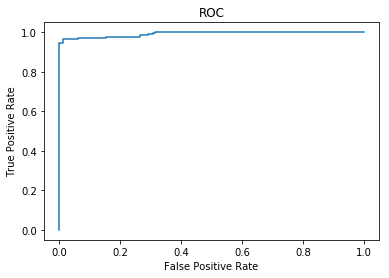

In [58]:
# plotting the ROC curve

%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

### BERNOULLI NB

In [60]:
docs2 = pd.read_table('Datasets/SMSSpamCollection+(1)', header=None, names=['Class', 'sms'])
docs2.head()


C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
docs2.Class.value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [62]:
ham_spam1=docs2.Class.value_counts()
ham_spam1

ham     4825
spam     747
Name: Class, dtype: int64

In [63]:
print("Spam % is ",(ham_spam1[1]/float(ham_spam1[0]+ham_spam1[1]))*100)

Spam % is  13.406317300789663


In [64]:
docs2['label'] = docs2.Class.map({'ham':0, 'spam':1})

In [65]:
docs2.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [66]:
X1=docs2.sms
y1=docs2.label

In [67]:
print(X1.shape)
print(y1.shape)

(5572,)
(5572,)


In [68]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=1)

In [69]:
X_train.head()

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: sms, dtype: object

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorising the text
vect = CountVectorizer(stop_words='english')

In [71]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [72]:
vect.vocabulary_

{'4mths': 509,
 'half': 3089,
 'price': 5027,
 'orange': 4626,
 'line': 3852,
 'rental': 5310,
 'latest': 3763,
 'camera': 1527,
 'phones': 4822,
 'free': 2780,
 'phone': 4818,
 '11mths': 264,
 'mobilesdirect': 4248,
 '08000938767': 50,
 'update': 6673,
 'or2stoptxt': 4624,
 'cs': 1971,
 'did': 2169,
 'stitch': 6028,
 'trouser': 6545,
 'hope': 3260,
 'enjoyed': 2436,
 'new': 4442,
 'content': 1867,
 'text': 6321,
 'stop': 6038,
 '61610': 563,
 'unsubscribe': 6665,
 'help': 3180,
 '08712400602450p': 98,
 'provided': 5089,
 'tones2you': 6473,
 'uk': 6614,
 'heard': 3159,
 'u4': 6608,
 'rude': 5443,
 'chat': 1643,
 'private': 5040,
 '01223585334': 5,
 'cum': 1989,
 'wan': 6852,
 '2c': 374,
 'pics': 4837,
 'gettin': 2913,
 'shagged': 5628,
 'pix': 4858,
 '8552': 660,
 '2end': 378,
 'send': 5590,
 'sam': 5487,
 'xxx': 7127,
 'neva': 4438,
 'tell': 6289,
 'noe': 4477,
 'home': 3244,
 'da': 2015,
 'aft': 826,
 'wat': 6876,
 'wiskey': 7012,
 'brandy': 1389,
 'rum': 5450,
 'gin': 2927,
 'beer':

In [73]:
vect.get_feature_names()

['00',
 '000',
 '008704050406',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07090201529',
 '07090298926',
 '07123456789',
 '07732584351',
 '07734396839',
 '07742676969',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700469649',
 '08700621170150p',
 '08

In [74]:
# transform
X_train_transformed = vect.transform(X_train)
X_test_tranformed = vect.transform(X_test)

In [75]:
X_train_transformed

<4179x7204 sparse matrix of type '<class 'numpy.int64'>'
	with 32467 stored elements in Compressed Sparse Row format>

In [76]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb2 = BernoulliNB()

# fit 
bnb2.fit(X_train_transformed,y_train)

# predict class
y_pred_class = bnb2.predict(X_test_tranformed)

# predict probability
y_pred_proba =bnb2.predict_proba(X_test_tranformed)

# accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)


0.9770279971284996

In [77]:
bnb2

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [78]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1207,    1],
       [  31,  154]], dtype=int64)

In [79]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[1207    1]
 [  31  154]]


In [80]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.8324324324324325


In [81]:
specificity = TN / float(TN + FP)

print("specificity",specificity)

specificity 0.9991721854304636


In [82]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.9935483870967742
0.9935483870967742


In [83]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.9935483870967742
PRECISION SCORE : 0.9935483870967742
RECALL SCORE : 0.8324324324324325
F1 SCORE : 0.9058823529411765


In [84]:
y_pred_proba

array([[1.00000000e+00, 1.54647985e-10],
       [1.00000000e+00, 1.69177313e-10],
       [9.99999997e-01, 2.52488636e-09],
       ...,
       [9.99994219e-01, 5.78141360e-06],
       [3.64570741e-06, 9.99996354e-01],
       [1.00000000e+00, 2.90374743e-12]])

In [85]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [86]:
print (roc_auc)

0.9967692858421334


In [87]:
print(true_positive_rate)

[0.         0.25405405 0.28648649 0.2972973  0.3027027  0.32432432
 0.6        0.61081081 0.61621622 0.62702703 0.68648649 0.6972973
 0.74054054 0.74054054 0.76216216 0.77297297 0.83243243 0.83243243
 0.85945946 0.85945946 0.87567568 0.87567568 0.92972973 0.92972973
 0.94594595 0.94594595 0.95135135 0.95135135 0.96216216 0.96216216
 0.96756757 0.96756757 0.97297297 0.97297297 0.97297297 0.97297297
 0.97837838 0.97837838 0.99459459 0.99459459 0.99459459 0.99459459
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 

In [88]:
print(false_positive_rate)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.27814570e-04 8.27814570e-04 8.27814570e-04
 8.27814570e-04 1.65562914e-03 1.65562914e-03 2.48344371e-03
 2.48344371e-03 3.31125828e-03 3.31125828e-03 4.13907285e-03
 4.13907285e-03 5.79470199e-03 5.79470199e-03 7.45033113e-03
 7.45033113e-03 8.27814570e-03 8.27814570e-03 1.57284768e-02
 1.57284768e-02 4.63576159e-02 4.80132450e-02 7.11920530e-02
 7.11920530e-02 9.27152318e-02 9.27152318e-02 9.43708609e-02
 9.60264901e-02 1.28311258e-01 1.28311258e-01 2.14403974e-01
 2.16059603e-01 2.20198675e-01 2.23509934e-01 2.31788079e-01
 2.34271523e-01 2.47516556e-01 2.49172185e-01 2.65728477e-01
 2.69039735e-01 2.77317881e-01 2.78973510e-01 2.90562914e-01
 2.92218543e-01 3.00496689e-01 3.02980132e-01 3.30298013e-01
 3.33609272e-01 3.34437086e-01 3.36092715e-01 3.48509934e-01
 3.50165563e-01 3.625827

In [89]:
print(thresholds)

[2.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 9.99997890e-01 9.99996354e-01
 9.99995019e-01 9.99994956e-01 9.99331659e-01 9.99303596e-01
 9.95870863e-01 9.95462919e-01 9.89588895e-01 9.84971101e-01
 5.45317784e-01 2.10969418e-01 8.10085802e-02 5.71073030e-02
 2.90086028e-02 2.35876189e-02 9.51989482e-05 8.90802044e-05
 7.07278806e-05 4.70943921e-05 4.61263360e-05 1.55662920e-05
 1.08401730e-05 8.99660467e-06 6.09486970e-06 1.09724378e-06
 8.28411345e-07 4.96407211e-08 4.47105639e-08 2.06982466e-08
 2.05911266e-08 1.19010796e-08 1.14871194e-08 1.08372483e-08
 1.08303547e-08 5.09956933e-09 5.05703149e-09 1.68232631e-09
 1.65630671e-09 1.57483042e-09 1.57290293e-09 1.47852794e-09
 1.47818462e-09 1.26916365e-09 1.26104629e-09 1.05260899e-09
 1.04831205e-09 9.61532075e-10 9.60797541e-10 8.47442362e-10
 8.46842727e-10 7.92713879e-10 7.90831112e-10 6.31432888e-10
 6.28639336e-10 6.25266317e-10 6.23799594e-10 5.41076273e-10
 5.31177593e-10 4.949554

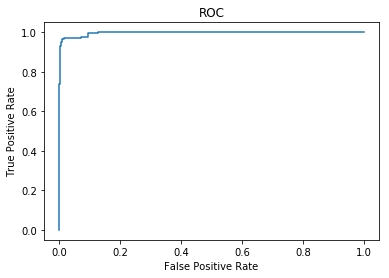

In [90]:
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)